In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from datetime import datetime

In [3]:
df = pd.read_csv('online_retail_clean.csv', encoding='windows-1252')

**Cleaning data inconsistency I have found during EDA process**

Product 'WHITE HANGING HEART T-LIGHT HOLDER' has two Stock Codes variations: 85123a and 85123A

In [48]:
df = df.replace(to_replace='85123a', value='85123A')

# The Goal:
Using past transactions data, identify: 
- the most popular products;
- the most active time intervals;
- the most active days of the week.

## Most Popular Products

### Best-selling products
Popularity by the **overall quantity** of the product purchased

In [49]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

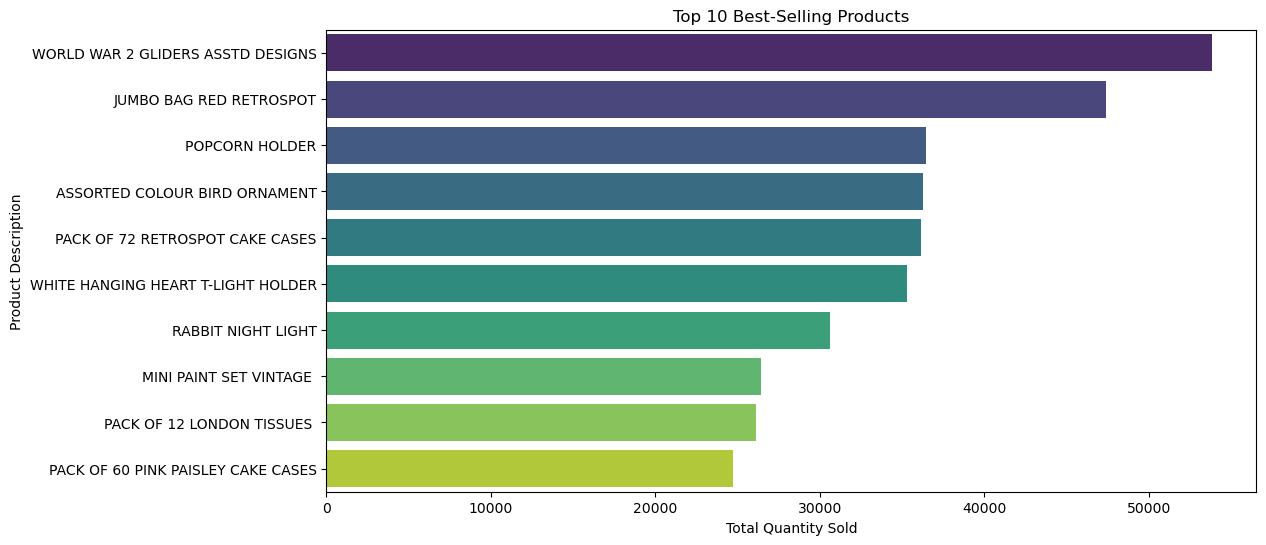

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis", hue=top_products.index)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Best-Selling Products')
plt.show()

**Checking for potential outliers**

In [51]:
df[df['Description'].str.contains('WORLD WAR 2')].sort_values(by='Quantity', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
508187,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26,0.21,12901,United Kingdom,1008.00
501405,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38,0.18,16754,United Kingdom,518.40
430555,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50,0.21,16333,United Kingdom,544.32
362327,549926,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1728,2011-04-13 10:14,0.21,16333,United Kingdom,362.88
373140,548635,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1152,2011-04-01 12:27,0.21,16333,United Kingdom,241.92
...,...,...,...,...,...,...,...,...,...
141323,570688,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1,2011-10-11 16:29,0.63,0,United Kingdom,0.63
451845,541219,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1,2011-01-14 14:06,0.42,0,United Kingdom,0.42
67298,576618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1,2011-11-15 17:00,0.63,0,United Kingdom,0.63
465928,540026,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1,2011-01-04 13:25,0.43,0,United Kingdom,0.43


In [52]:
df[df['Description'].str.contains('WORLD WAR 2')]['Quantity'].mean()

np.float64(101.02626641651032)

In [53]:
df[df['Description'].str.contains('WORLD WAR 2')]['Quantity'].median()

48.0

In [54]:
df.sort_values(by='Quantity', ascending=False).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
508187,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26,0.21,12901,United Kingdom,1008.00
314474,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52,0.72,13135,United Kingdom,3096.00
415086,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43,0.82,18087,United Kingdom,3202.92
254366,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04,0.06,14609,United Kingdom,191.16
515511,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20,2.10,15749,United Kingdom,6539.40
102289,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24,0.32,16308,United Kingdom,960.00
235464,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2011-08-04 18:06,1.45,12931,United Kingdom,4176.00
501405,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38,0.18,16754,United Kingdom,518.40
319047,554272,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2700,2011-05-23 13:08,0.42,12901,United Kingdom,1134.00
430555,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50,0.21,16333,United Kingdom,544.32


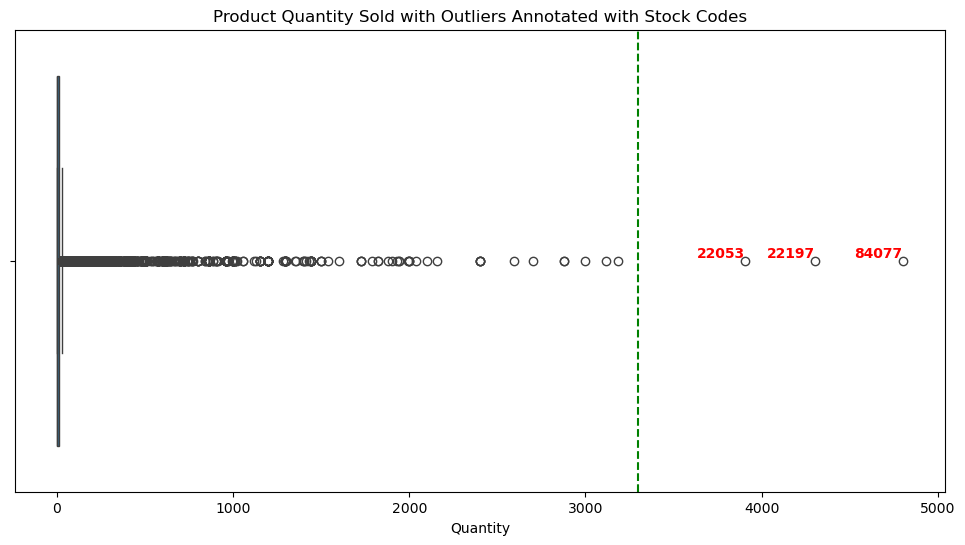

In [55]:
# Calculate IQR for outlier detection
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter extreme outliers (above upper bound)
outliers = df[df['Quantity'] > upper_bound].sort_values(by='Quantity', ascending=False)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Quantity'])

plt.axvline(x=3300, color='green', linestyle='--')

# Select the top 3 extreme outliers to annotate
top_outliers = outliers.head(3)

# Annotate specific outlier points
for index, row in top_outliers.iterrows():
    plt.text(row['Quantity'], 0, str(row['StockCode']), 
             verticalalignment='bottom', horizontalalignment='right', 
             fontsize=10, color='red', weight='bold')

# Show plot
plt.title("Product Quantity Sold with Outliers Annotated with Stock Codes")
plt.show()

In [56]:
# Excluding outliers
df_no_outliers = df[(df.StockCode != '84077') & (df.StockCode != '22197') & (df.StockCode != '22053')]

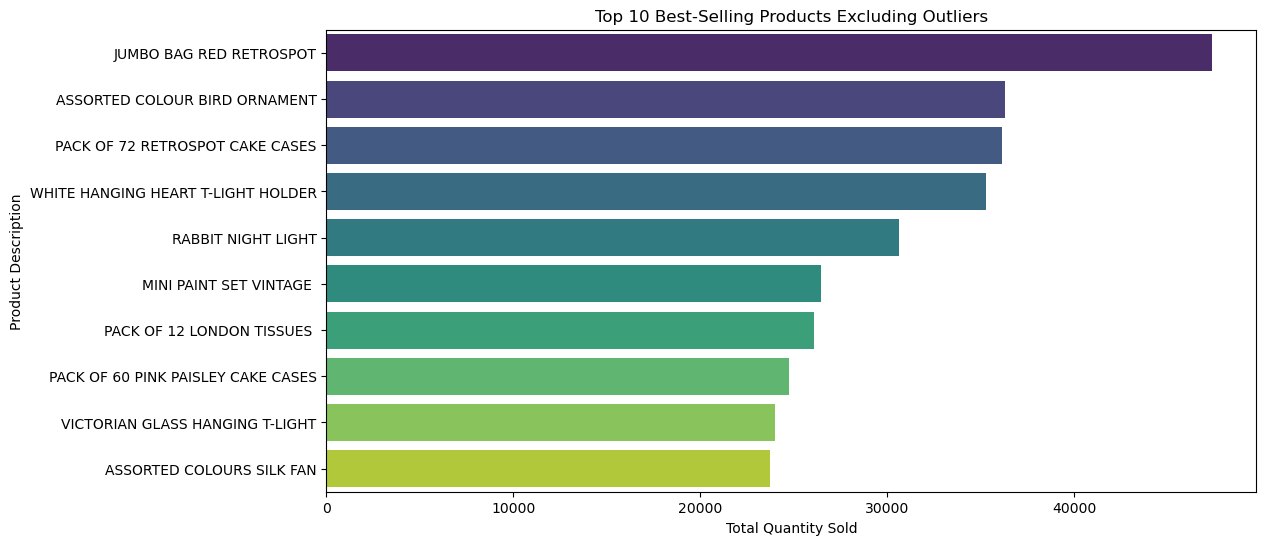

In [57]:
top_no_outliers = df_no_outliers.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_no_outliers.values, y=top_no_outliers.index, palette='viridis', hue=top_no_outliers.index)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Best-Selling Products Excluding Outliers')
plt.show()

In [58]:
df[df.Description=='JUMBO BAG RED RETROSPOT'].count()

InvoiceNo      2098
StockCode      2098
Description    2098
Quantity       2098
InvoiceDate    2098
UnitPrice      2098
CustomerID     2098
Country        2098
Total          2098
dtype: int64

### Frequently purchased products
Popularity by the **number of unique transactions** for the product

In [59]:
# Frequently bought products
frequent_products = df.groupby('Description')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

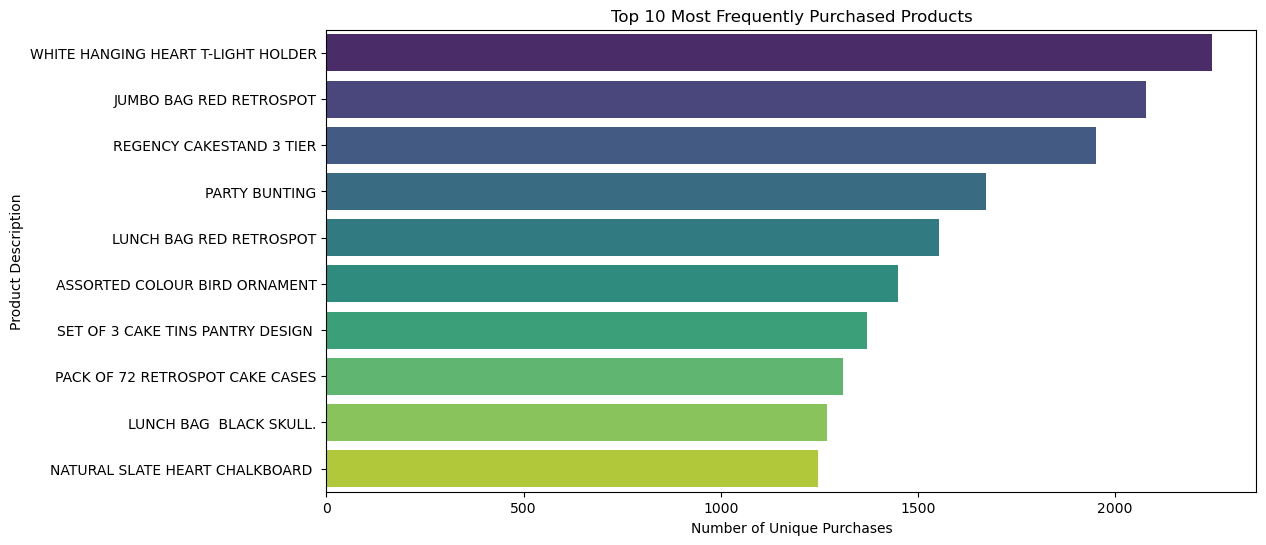

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x=frequent_products.head(10).values, y=frequent_products.head(10).index, palette="viridis", hue=frequent_products.head(10).index)
plt.xlabel('Number of Unique Purchases')
plt.ylabel('Product Description')
plt.title('Top 10 Most Frequently Purchased Products')
plt.show()

### Most Profitable Products

In [61]:
df['Total'] = df.Quantity*df.UnitPrice

In [62]:
profitable_products = df.groupby('Description')['Total'].sum().sort_values(ascending=False).head(10)

In [63]:
import matplotlib.ticker as mticker

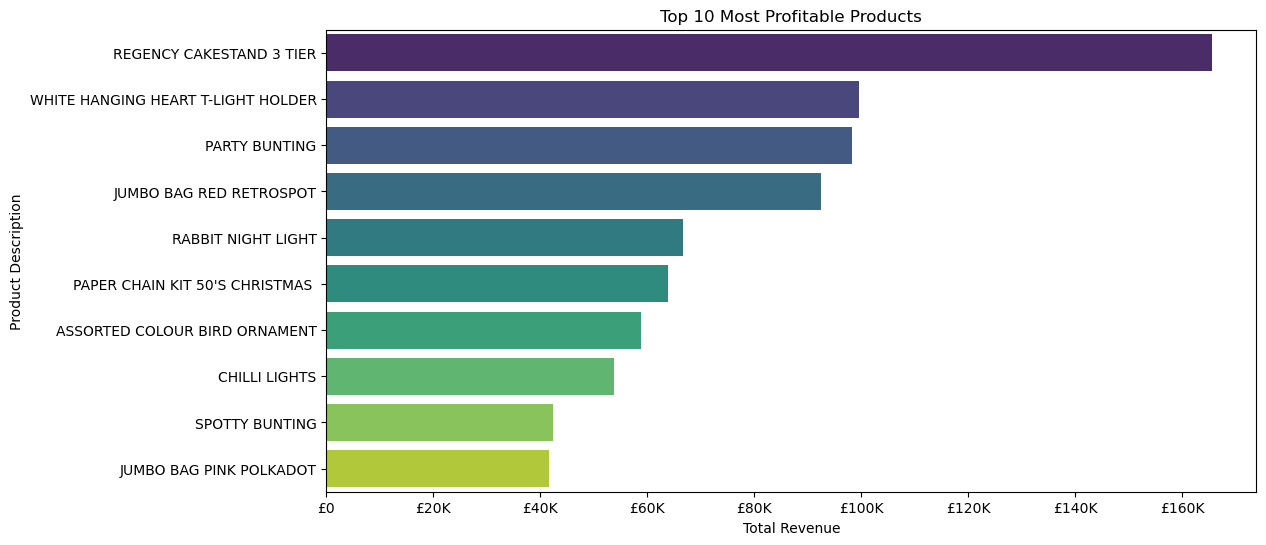

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x=profitable_products.values, y=profitable_products.index, palette="viridis", hue=profitable_products.index)

# Custom function to format ticks (e.g., 120000 → £120K)
def currency_format(value, tick_position):
    return f"£{int(value/1000)}K" if value >= 1000 else f"£{int(value)}"

# Apply formatter to x-axis
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.title('Top 10 Most Profitable Products')
plt.show()

### Combining all together

In [65]:
best_products = set(top_products.index.tolist() + profitable_products.index.tolist() + frequent_products.index.tolist())

In [66]:
df_best = df[df.Description.isin(best_products)]

In [77]:
df_best.groupby(['Description', 'StockCode'])['Quantity'].sum().sort_values(ascending=False)

Description                         StockCode
WORLD WAR 2 GLIDERS ASSTD DESIGNS   84077        53847
JUMBO BAG RED RETROSPOT             85099B       47381
POPCORN HOLDER                      22197        36454
ASSORTED COLOUR BIRD ORNAMENT       84879        36291
PACK OF 72 RETROSPOT CAKE CASES     21212        36133
WHITE HANGING HEART T-LIGHT HOLDER  85123A       35300
RABBIT NIGHT LIGHT                  23084        30642
MINI PAINT SET VINTAGE              22492        26438
PACK OF 12 LONDON TISSUES           22616        26095
PACK OF 60 PINK PAISLEY CAKE CASES  21977        24723
JUMBO BAG PINK POLKADOT             22386        20994
PAPER CHAIN KIT 50'S CHRISTMAS      22086        18922
LUNCH BAG RED RETROSPOT             20725        18675
PARTY BUNTING                       47566        18027
REGENCY CAKESTAND 3 TIER            22423        13091
LUNCH BAG  BLACK SKULL.             20727        12077
CHILLI LIGHTS                       79321        10222
NATURAL SLATE HEART

In [78]:
result = df_best.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

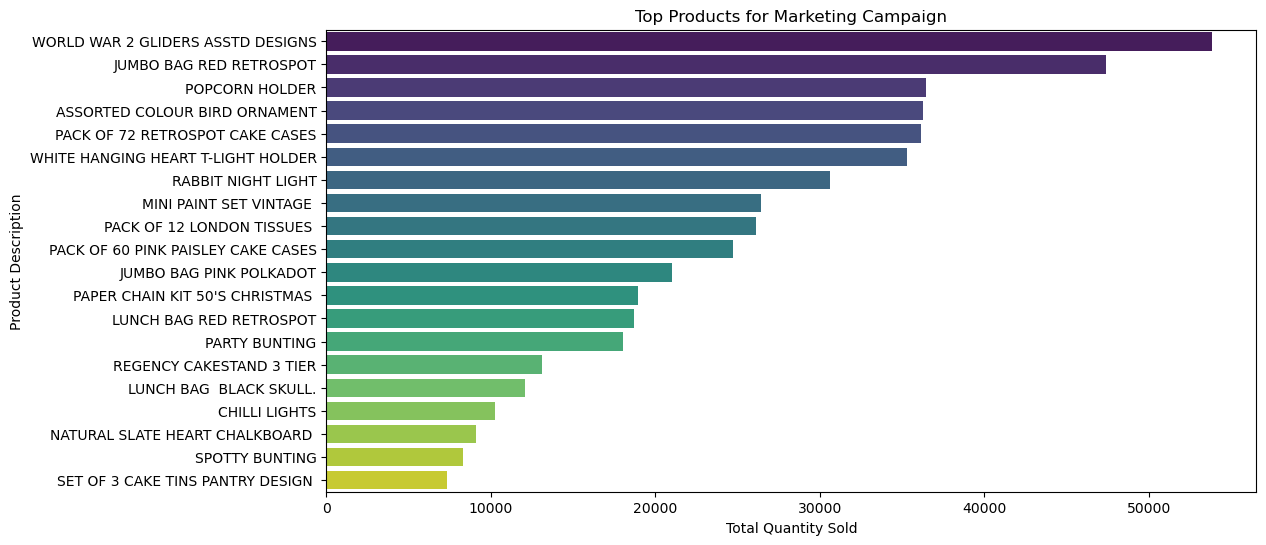

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x=result.head(20).values, y=result.head(20).index, palette="viridis", hue=result.head(20).index)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top Products for Marketing Campaign')
plt.show()

## Best timing

In [86]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.to_period("M")  # extract month
df["WeekDay"] = df["InvoiceDate"].dt.day_name() # extract week of the day

### Best Day

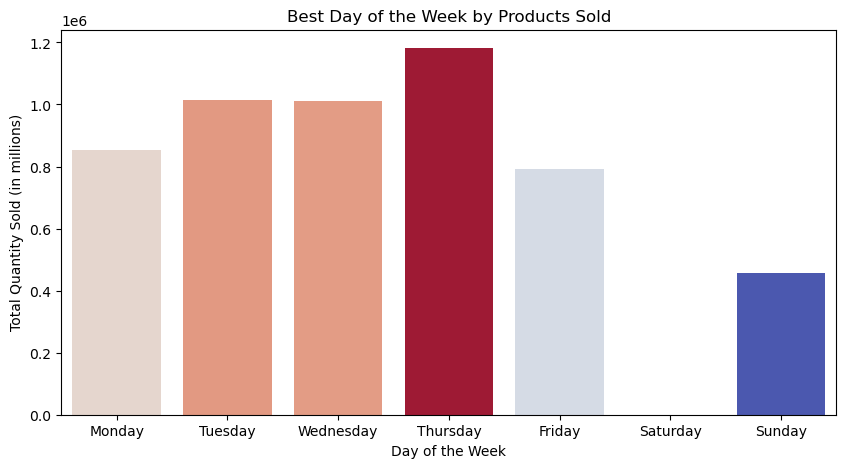

In [92]:
# Aggregate sales per day of the week
weekly_sales = df.groupby('WeekDay')['Quantity'].sum()

# Order days correctly
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, order=order, palette="coolwarm", hue=weekly_sales.values, legend=False)
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold (in millions)')
plt.title('Best Day of the Week by Products Sold')
plt.show()

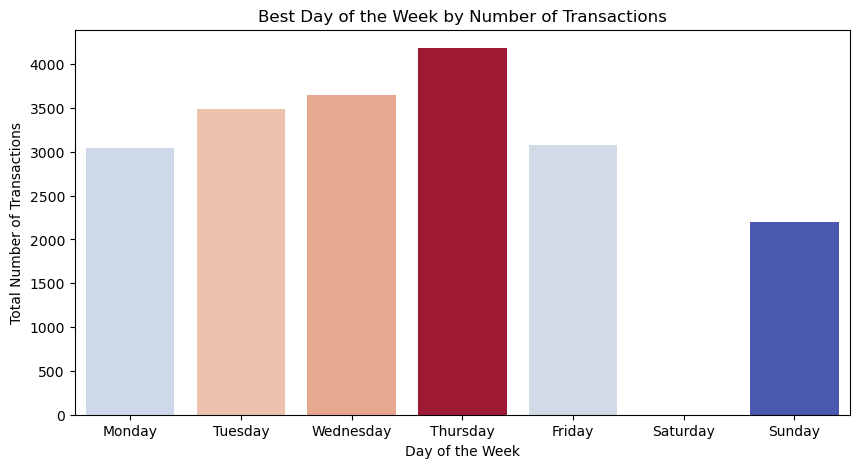

In [91]:
# Aggregate sales per day of the week
weekly_trans = df.groupby('WeekDay')['InvoiceNo'].nunique().sort_values(ascending=False)

# Order days correctly
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_trans.index, y=weekly_trans.values, order=order, palette='coolwarm', hue=weekly_trans.values, legend=False)
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Transactions')
plt.title('Best Day of the Week by Number of Transactions')
plt.show()

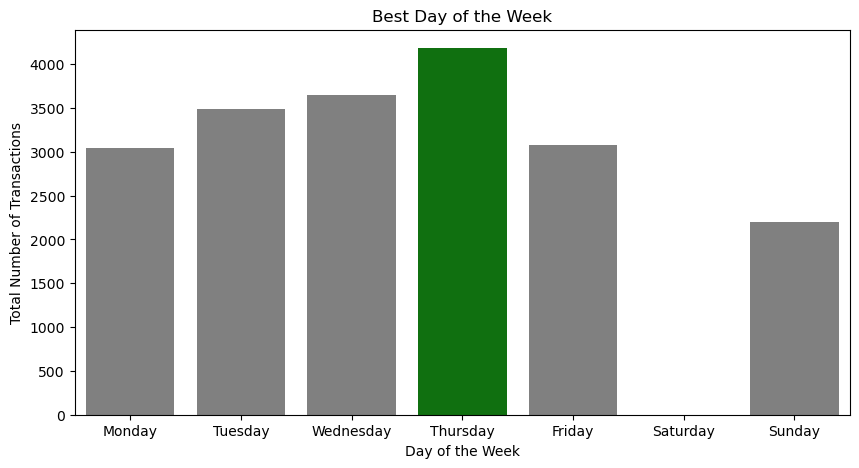

In [97]:
# Different colour pallette

plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_trans.index, y=weekly_trans.values, order=order, palette=['grey','grey','grey','grey','grey','green'], hue=weekly_trans.values, legend=False)
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Transactions')
plt.title('Best Day of the Week')
plt.show()

## Best Time

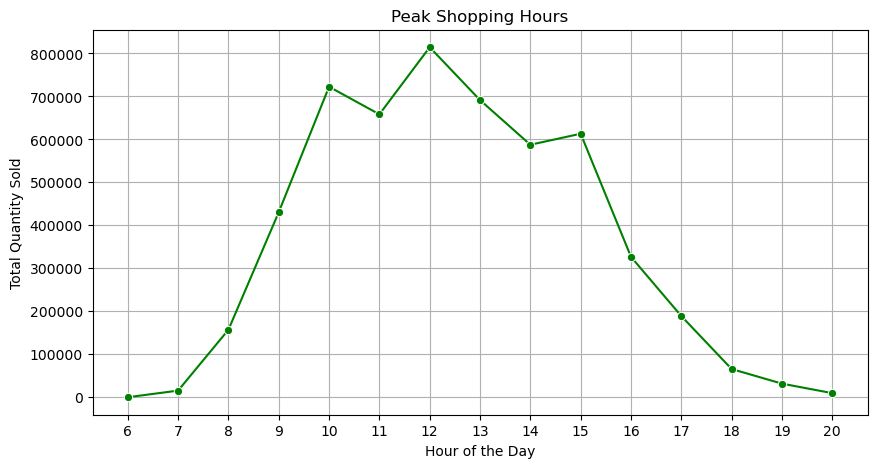

In [94]:
df['Hour'] = df['InvoiceDate'].dt.hour  # extract hour

hourly_sales = df.groupby('Hour')['Quantity'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o", color="g")
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.title('Peak Shopping Hours')
plt.xticks(range(6, 21))
plt.grid()
plt.show()

## Seasonal

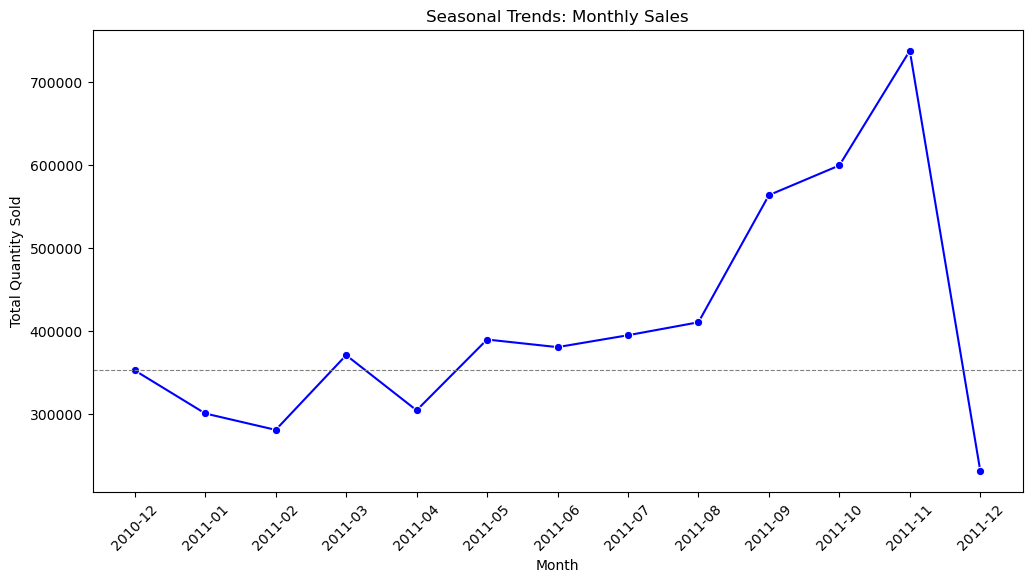

In [95]:
# Aggregate revenue per month
monthly_sales = df.groupby("Month")["Quantity"].sum()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o", color="b")

y_value = monthly_sales['2010-12']
plt.axhline(monthly_sales['2010-12'], color='gray', linewidth=0.8, linestyle='--',)

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.title("Seasonal Trends: Monthly Sales")
plt.show()